In [4]:
import import_ipynb
import os
import pandas as pd
import gensim
from collections import Counter
from pprint import pprint

import nltk
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english') + ['return']

import spacy
nlp = spacy.load('en')

from WNDomains import WordNetDomains 
wnd = WordNetDomains(wordnet_home='.')

import seaborn as sns; sns.set()
from matplotlib import pyplot as plt


In [5]:
path= r'/Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/ANALISI TRAME/TRAME/DISNEY'

THRESHOLD = 0.5
dict_all_domains=dict()

for dirpath, dirnames, files in os.walk(path):    
    if len(files) < 1:
        continue
        
    decade_domains = {}
    decade_domain_counter = Counter()
    tot_decade_movies = len(files)
    
    for file in files:
        if file[0] == '.':
            continue
        
        movie_domain_counter = Counter()

        with open(dirpath+ "/" + file, 'r', encoding='Latin-1') as f:
            text = f.read()
            doc = nlp(text)
            words = set([token.text for token in doc if (len(token.text) > 2 and token.pos_ in ['NOUN', 'PROPN'])])
            words = words.difference(en_stopwords) 

            movie=file.split('.')[0]
            decade=dirpath.split('/')[-1]

            #print(movie)
            for word in words:
                domain = wnd.get_domains(word, 'n', first_sense_only=True)
                
                # since domain is a set()
                for tmp_d in domain:
                    if tmp_d != 'factotum':
                        #print(word, '->', tmp_d)
                        movie_domain_counter[tmp_d] += 1
                    
            for md in movie_domain_counter:
                if movie_domain_counter[md] > 1:
                    decade_domain_counter[md] += 1
                
            #pprint(movie_domain_counter)
            
    #print(decade, tot_decade_movies)
    for dd in decade_domain_counter:
        #print(dd, decade_domain_counter[dd])
        domain_movies_len = decade_domain_counter[dd]
        
        if domain_movies_len >= (tot_decade_movies * THRESHOLD):
            weight = domain_movies_len/(tot_decade_movies*1.0)
            
            if dd in dict_all_domains:
                dict_all_domains[dd][decade] = weight
            else:
                dict_all_domains[dd] = {decade: weight}
                

In [6]:
full_df = pd.DataFrame(columns=['1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010'])

for dom, decs in dict_all_domains.items():
    full_df.loc[dom] = [round(decs.get(str(dec),0.0), 2) for dec in range(1930, 2010 +1, 10)]
    
full_df.sort_index(inplace=True)

In [7]:
full_df

,1930,1940,1950,1960,1970,1980,1990,2000,2010
administration,0.0,0.6,0.0,0.67,0.50,0.0,0.00,0.00,0.00
anatomy,0.0,0.6,0.0,0.00,0.50,0.0,0.00,0.00,0.00
animals,1.0,0.8,0.8,1.00,0.75,1.0,0.67,0.69,0.56
biology,1.0,0.6,1.0,1.00,0.75,1.0,0.80,0.77,0.56
buildings,1.0,0.0,1.0,0.67,0.50,0.6,0.53,0.69,0.72
chemistry,1.0,0.0,0.0,0.00,0.50,0.0,0.00,0.50,0.52
economy,0.0,0.0,0.5,0.67,0.00,0.8,0.54,0.00,0.60
furniture,1.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00
geography,1.0,0.8,0.8,1.00,0.50,1.0,0.87,0.85,0.72
geology,1.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00


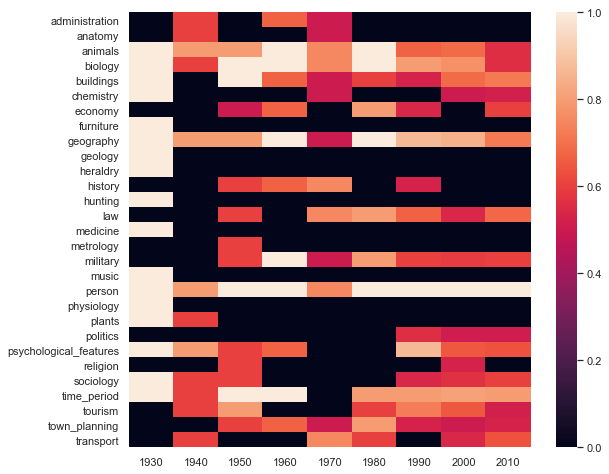

In [8]:
plt.figure(figsize=(9,8))
ax = sns.heatmap(full_df.values, yticklabels=full_df.index.values, xticklabels=full_df.columns)